


**Imaging Data Description**

All BraTS multimodal scans are available as NIfTI files (.nii.gz) and describe a) native (T1) and b) post-contrast T1-weighted (T1Gd), c) T2-weighted (T2), and d) T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) volumes, and were acquired with different clinical protocols and various scanners from multiple (n=19) institutions, mentioned as data contributors here.

All the imaging datasets have been segmented manually, by one to four raters, following the same annotation protocol, and their annotations were approved by experienced neuro-radiologists. Annotations comprise the GD-enhancing tumor (ET — label 4), the peritumoral edema (ED — label 2), and the necrotic and non-enhancing tumor core (NCR/NET — label 1), as described both in the BraTS 2012-2013 TMI paper and in the latest BraTS summarizing paper. The provided data are distributed after their pre-processing, i.e., co-registered to the same anatomical template, interpolated to the same resolution (1 mm^3) and skull-stripped.


### <a id='toc1_3_3_'></a>[U-Net Model](#toc0_)

**U-Net** is a fully convolutional neural network originally designed for semantic image segmentation of biomedical images. This network features a distinctive encoder-decoder structure, making it exceptionally effective for detailed and precise image analysis tasks in the medical field. Since its inception, U-Net has been widely recognized for its robust performance in segmenting complex anatomical structures in medical scans, such as MRIs and CT images.

The architecture of U-Net is particularly notable for its ability to capture contextual information at various scales, which is crucial for accurate segmentation. The encoder part of the network progressively reduces the spatial dimension of the image, capturing high-level semantic information. Conversely, the decoder part gradually recovers object details and spatial dimensions, ensuring precise localization.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Kk-yKGkvRtkNzLkZdP3Pag/unet.png" width="70%" alt="indexing"/>

**Reference:**
1. Original Paper: [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)

In [1]:
# Import libraries

import os
import cv2
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data
import nibabel as nib

import requests
import zipfile
import io
import os

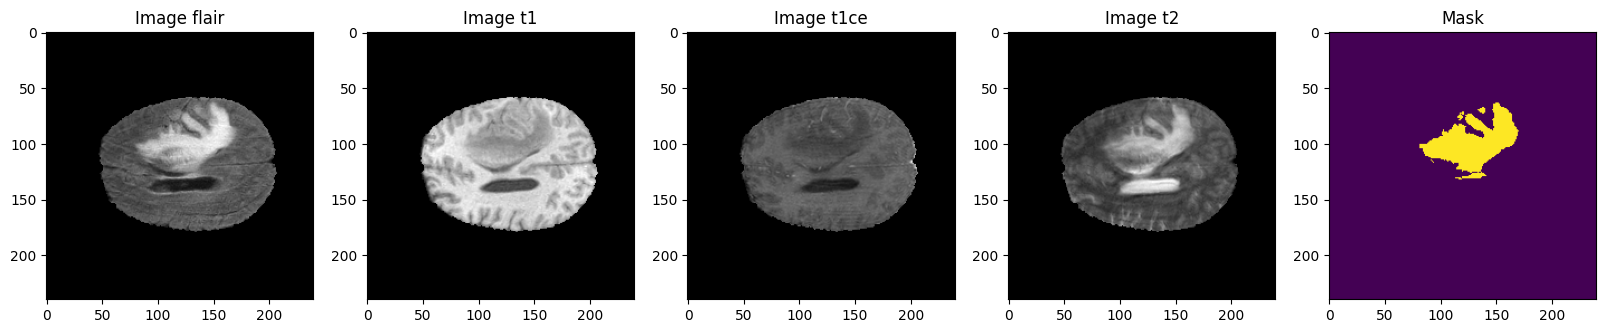

In [3]:
##########################################################
# TODO:
# Load images and plot some samples
# Apply transformations if necessary
# Split data into train and validation sets
# Apply data augmentation on train set if needed
# Create dataloaders
##########################################################

batch_size = 8

train_dataset = ...
val_dataset = ...

train_dataloader = ...
val_dataloader = ...


Let's construct a U-Net model for the dataset.

In [ ]:
import torch
import torch.nn as nn


##########################################################
# TODO:
# Complete UNet model
##########################################################


def double_convolution(in_channels, out_channels):
    """
    In the original paper implementation, the convolution operations were
    not padded but we are padding them here. This is because, we need the
    output result size to be same as input size.
    """
    conv_op = ...

    return conv_op

class UNet(nn.Module):
    def __init__(self, num_classes):
        super(UNet, self).__init__()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        # Contracting path.
        # Each convolution is applied twice.
        self.down_convolution_1 = double_convolution(1, 64)
        self.down_convolution_2 = double_convolution(64, 128)
        self.down_convolution_3 = double_convolution(128, 256)
        self.down_convolution_4 = double_convolution(256, 512)
        self.down_convolution_5 = double_convolution(512, 1024)

        # Expanding path
        self.up_transpose_1 = ...

        self.up_convolution_1 = double_convolution(1024, 512)
        self.up_transpose_2 = ...

        self.up_convolution_2 = double_convolution(512, 256)
        self.up_transpose_3 = ...

        self.up_convolution_3 = double_convolution(256, 128)
        self.up_transpose_4 = ...

        self.up_convolution_4 = double_convolution(128, 64)
        # output => `out_channels` as per the number of classes.
        self.out = ...

    def forward(self, x):
        out = ...

        return out

In [ ]:
##########################################################
# TODO
# Complete loss functions
##########################################################

class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        Dice = ...

        return Dice



class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()
        self.bce_losss = nn.BCEWithLogitsLoss()

    def forward(self, inputs, targets, smooth=1):

        Dice_BCE = ...

        return Dice_BCE

In [ ]:
##########################################################
# TODO
# Train model on 3 different losses and store them (BCE, Dice, BCE+Dice)
##########################################################


from tqdm.notebook import tqdm
import torch.nn.functional as F

device = 'cuda'
model = UNet(num_classes=1).to(device)
optim = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = ...

train_losses = []
val_losses = []

# Training and validation loop
for e in tqdm(range(epochs), leave=False, desc="Epoch"):
    model.train()
    epoch_train_loss = 0  # To accumulate loss for each epoch

    for data, labels in tqdm(train_dataloader, leave=False, desc="   Training Dataset"):
        optim.zero_grad()
        prediction = model(data.to(device))
        loss = ...
        loss.backward()
        optim.step()
        epoch_train_loss += loss.item()  # Summing up the loss for the epoch

    average_train_loss = epoch_train_loss / len(train_dataloader)
    train_losses.append(average_train_loss)

    # Validation step
    model.eval()
    epoch_val_loss = 0  # To accumulate loss for validation
    with torch.no_grad():
        for data, labels in tqdm(val_dataloader, leave=False, desc="   Validation Dataset"):
            prediction = model(data.to(device))
            loss = ...
            epoch_val_loss += loss.item()  # Summing up the loss for the epoch

    average_val_loss = epoch_val_loss / len(val_dataloader)
    val_losses.append(average_val_loss)

    print(f"Epoch {e+1}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}")

In [ ]:
##########################################################
# TODO:
# Plot training and validation loss curves
##########################################################

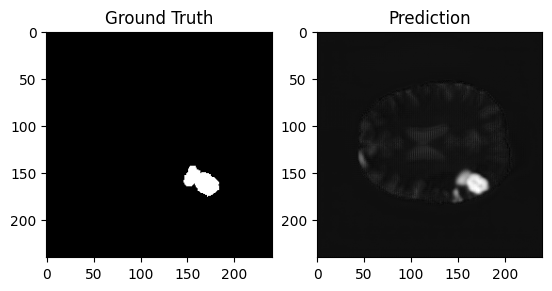

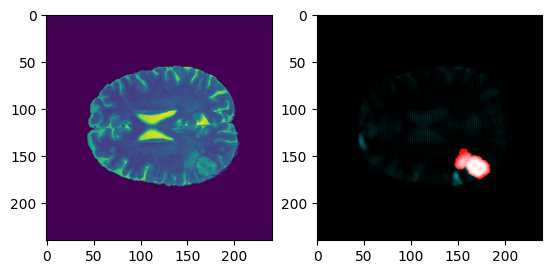

In [ ]:
##########################################################
# TODO:
# Plot some validation results
##########################################################


# Set the model to evaluation mode
model.eval()

X, y = next(iter(val_dataloader))
X, y = X.to(torch.device('cpu')), y.to(torch.device('cpu'))

with torch.inference_mode():
    y_pred = model(X.to(device))

y1 = y[4, 0].cpu().detach().numpy()
y2 = y_pred[4, 0].cpu().detach().numpy()
plt.subplot(121)
plt.imshow(y1, cmap='gray')
plt.title('Ground Truth')
plt.subplot(122)
plt.imshow(y2, cmap='gray')
plt.title('Prediction')
plt.show()


y_color = np.zeros((*y1.shape, 3))
y_color[..., 0] = y1
y_color[..., 1] = y2
y_color[..., 2] = y2


plt.subplot(121)
plt.imshow(X[4, 0].cpu().detach().numpy())
plt.subplot(122)
plt.imshow(y_color)

Now we augment the regular UNet with several sub-modules and techniques such as ResNets, Attention modules, etc. We describe the expected architecture for this notebook:

+ *ResNet:* As a base sub-module, we define each ResNet block as two consecutive convolutional layers with a GELU activation in between and Group Normalization after each convolutional layer. You can use this module in Down/Up blocks. Also, by removing the residual connection, you can use this block as a convolutional network throughout the network.
+ *Attention:* This is also a sub-module consisting of a Layer Normalization, Multi-head Attention (use from `torch.nn`), a residual connection, a feed-forward network, and another residual connection.

You can implement the following structure for UNet:

+ Convolutional block
+ Down block
+ Attention
+ Down block
+ Attention
+ Down block
+ Attention

+ Convolutional block (bottleneck)
+ Convolutional block (bottleneck)
+ Convolutional block (bottleneck)

+ Up block
+ Attention
+ Up block
+ Attention
+ Up block
+ Attention
+ Convolutional block

In [ ]:
##########################################################
# TODO
# Complete each class based on the previous explanations.
##########################################################

class ConvResNet(nn.Module):
    def __init__(self, *args, **kwargs):
        super(ConvResNet, self).__init__()

    def forward(self, x):
        pass

class Down(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Down, self).__init__()

    def forward(self, x, t):
        pass


class Up(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Up, self).__init__()

    def forward(self, x, skip, t):
        pass


class Attention(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Attention, self).__init__()

    def forward(self, x):
        pass


class UNet_Attention(nn.Module):
    def __init__(self, *args, **kwargs):
        super(UNet, self).__init__()

    def forward(self, x, t):
        pass

In [ ]:
##########################################################
# TODO
# Train UNet-Attention model with a desired loss
# Plot loss curves and some results on validation samples
##########################################################